In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim, mean_squared_error

1. Загрузите изображение в оттенках серого sar_1_gray.jpg.

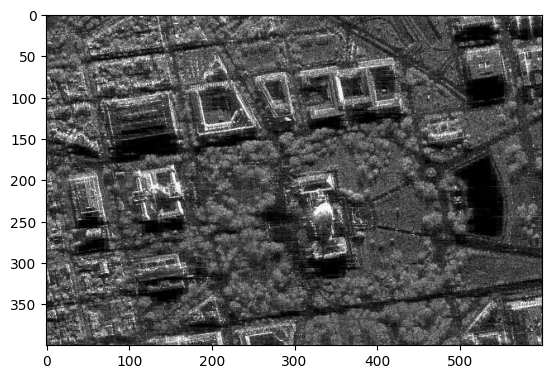

In [4]:
image = cv2.imread('sar_1_gray.jpg', cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap="gray")

2. постройте гистограмму

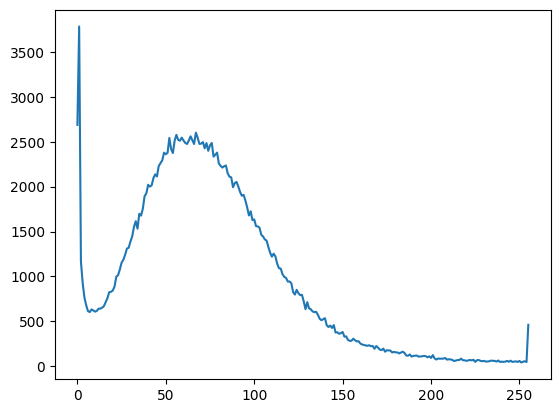

In [5]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([image], [0], None, [histSize], histRange, accumulate=accumulate)
plt.plot(b_hist)

3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.

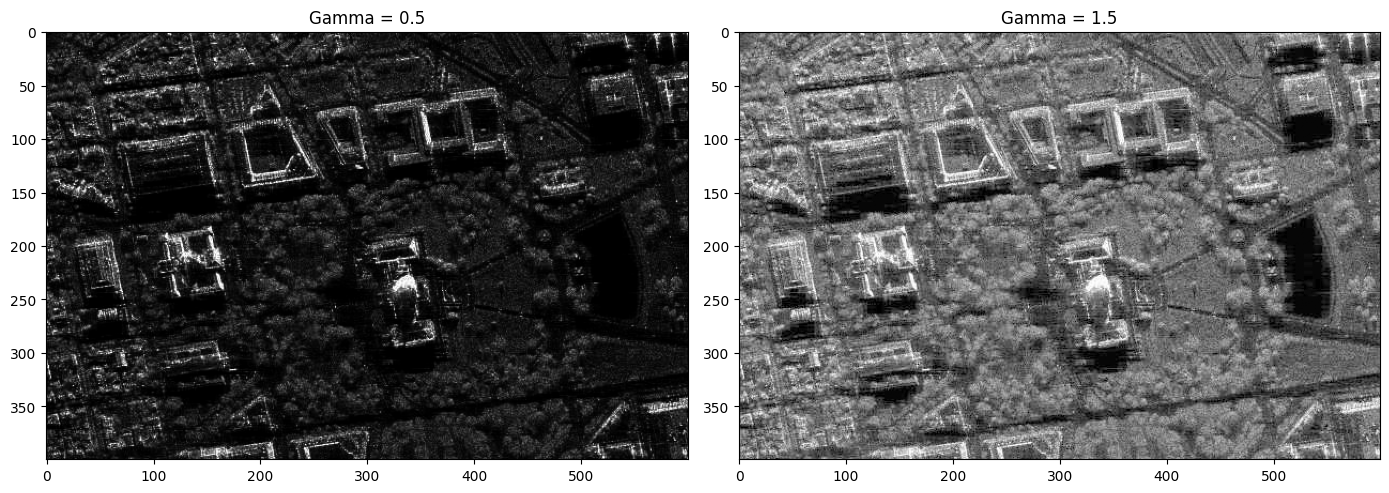

In [25]:
def gamma_correction(image, gamma):
    gamma_correct = 255 * np.power(image / 255.0, 1.0 / gamma)
    return gamma_correct.astype(np.uint8)

img_gm_05 = gamma_correction(image, 0.5)
img_gm_15 = gamma_correction(image, 1.5)

plt.figure(figsize=(14, 14))

plt.subplot(1, 2, 1)
plt.imshow(img_gm_05, cmap='gray')
plt.title('Gamma = 0.5')

plt.subplot(1, 2, 2)
plt.imshow(img_gm_15, cmap='gray')
plt.title('Gamma = 1.5')

plt.tight_layout()
plt.show()

4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.

In [27]:
def compare_images(img1, img2, title):
    mse_val = mean_squared_error(img1, img2)
    ssim_val = ssim(img1, img2, data_range=255)
    print(f"{title}\nMSE: {mse_val:.2f}, SSIM: {ssim_val:.4f}")
    return mse_val, ssim_val

res1 = compare_images(image, img_gm_05, "Исходное и γ = 0.5")
res2 = compare_images(image, img_gm_15, "Исходное и γ = 2.0")

Исходное и γ = 0.5
MSE: 2383.76, SSIM: 0.5270
Исходное и γ = 2.0
MSE: 1114.45, SSIM: 0.8940


5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.

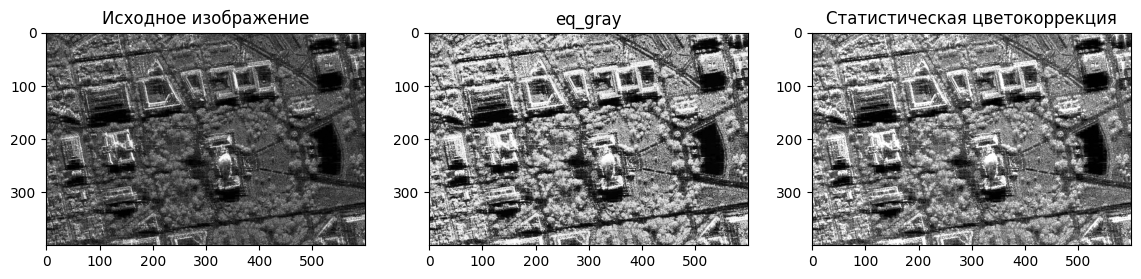

In [32]:
def statistical_correction(img, reference_img):
    current_mean = np.mean(img)
    current_std = np.std(img)

    ref_mean = np.mean(reference_img)
    ref_std = np.std(reference_img)

    corrected = (img - current_mean) * (ref_std / current_std) + ref_mean
    corrected = np.clip(corrected, 0, 255)

    return corrected.astype(np.uint8)

eq_gray = cv2.equalizeHist(image)
img_stat_corrected = statistical_correction(image, eq_gray)

plt.figure(figsize=(14, 14))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')

plt.subplot(1, 3, 2)
plt.imshow(eq_gray, cmap='gray')
plt.title('eq_gray')

plt.subplot(1, 3, 3)
plt.imshow(img_stat_corrected, cmap='gray')
plt.title('Статистическая цветокоррекция')

plt.show()

6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.

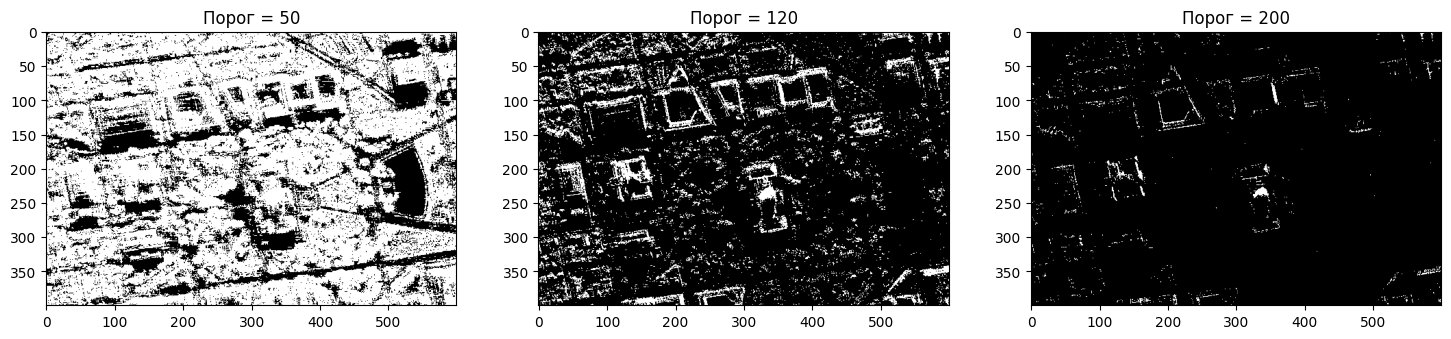

In [39]:
thresholds = [50, 120, 200]

plt.figure(figsize=(18, 14))

for i, thresh in enumerate(thresholds):
    _, img_thresh = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
    plt.subplot(1, 3, 1 + i)
    plt.imshow(img_thresh, cmap='gray')
    plt.title(f'Порог = {thresh}')

plt.show()

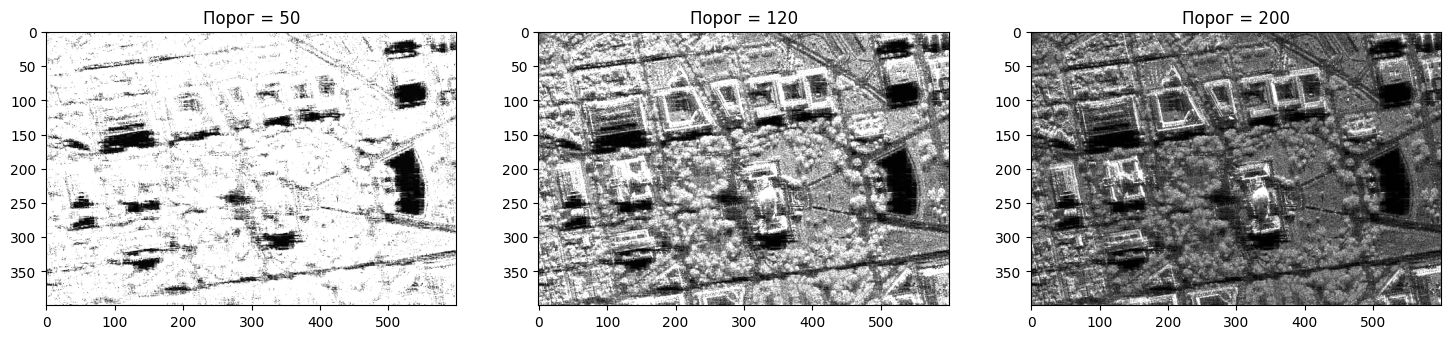

In [40]:
thresholds = [50, 120, 200]

plt.figure(figsize=(18, 14))

for i, thresh in enumerate(thresholds):
    _, img_thresh = cv2.threshold(image, thresh, 255, cv2.THRESH_TRUNC)
    plt.subplot(1, 3, 1 + i)
    plt.imshow(img_thresh, cmap='gray')
    plt.title(f'Порог = {thresh}')

plt.show()